In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [13]:
excer = pd.read_csv('exercise.csv', index_col='User_ID')
excer.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8
14861698,female,20,166.0,60.0,14.0,94.0,40.3
11179863,male,69,179.0,79.0,5.0,88.0,38.7
16180408,female,34,179.0,71.0,13.0,100.0,40.5
17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
calo_df = pd.read_csv('calories.csv', index_col='User_ID')
calo_df.head()

,Calories
User_ID,
14733363,231.0
14861698,66.0
11179863,26.0
16180408,71.0
17771927,35.0


In [15]:
df = pd.concat([excer, calo_df['Calories']], axis=1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
df.shape

(15000, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [18]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# EDA

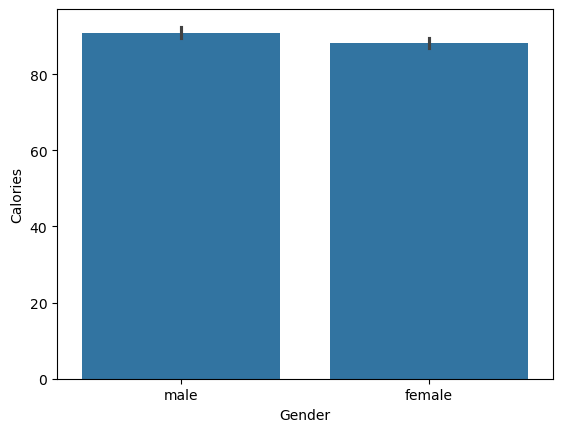

In [20]:
sns.barplot(data =df, x = 'Gender', y='Calories');

In [21]:
new_df = df.drop(['Gender'], axis=1)
corr = new_df.corr()

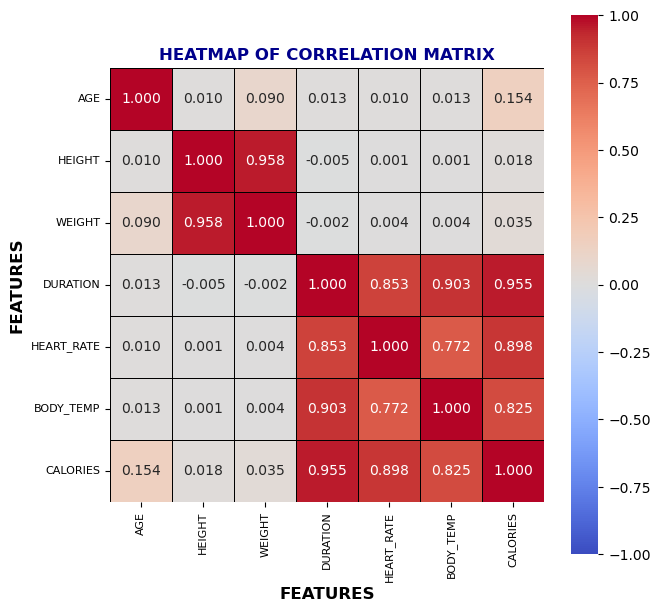

In [40]:
fig, ax = plt.subplots(figsize = (7,7))

sns.heatmap(data= corr, cbar =True, square=True, fmt='.3f', cmap = 'coolwarm', annot=True, annot_kws={'size':10}, vmax =1, vmin=-1, 
            linewidths=0.5, linecolor='black')
ax.set_xticklabels([col.upper() for col in new_df.columns], fontsize=8, rotation=90)
ax.set_yticklabels([col.upper() for col in new_df.columns], fontsize=8, rotation=0)

# In hoa label trục X, Y
ax.set_xlabel("FEATURES", fontsize=12, fontweight='bold')
ax.set_ylabel("FEATURES", fontsize=12, fontweight='bold')

ax.set_title("HEATMAP OF CORRELATION MATRIX", fontsize=12, fontweight='bold', color='darkblue');

In [41]:
le = LabelEncoder()
le.fit(df['Gender'])

LabelEncoder()

In [42]:
df['Gender'] = le.transform(df['Gender'])

In [44]:
X = df.drop(['Calories'], axis=1)
y = df['Calories']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
model = XGBRegressor()

In [47]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred_train = model.predict(X_train)
train_r2 = r2_score(y_pred_train,y_train)
print('R square vale:', train_r2)

R square vale: 0.9995595683208414


In [49]:
y_pred_test = model.predict(X_test)
test_r2 = r2_score(y_pred_test,y_test)
print('R square vale:', test_r2)

R square vale: 0.9987889027726174


In [51]:
y_test = np.asarray(y_test)

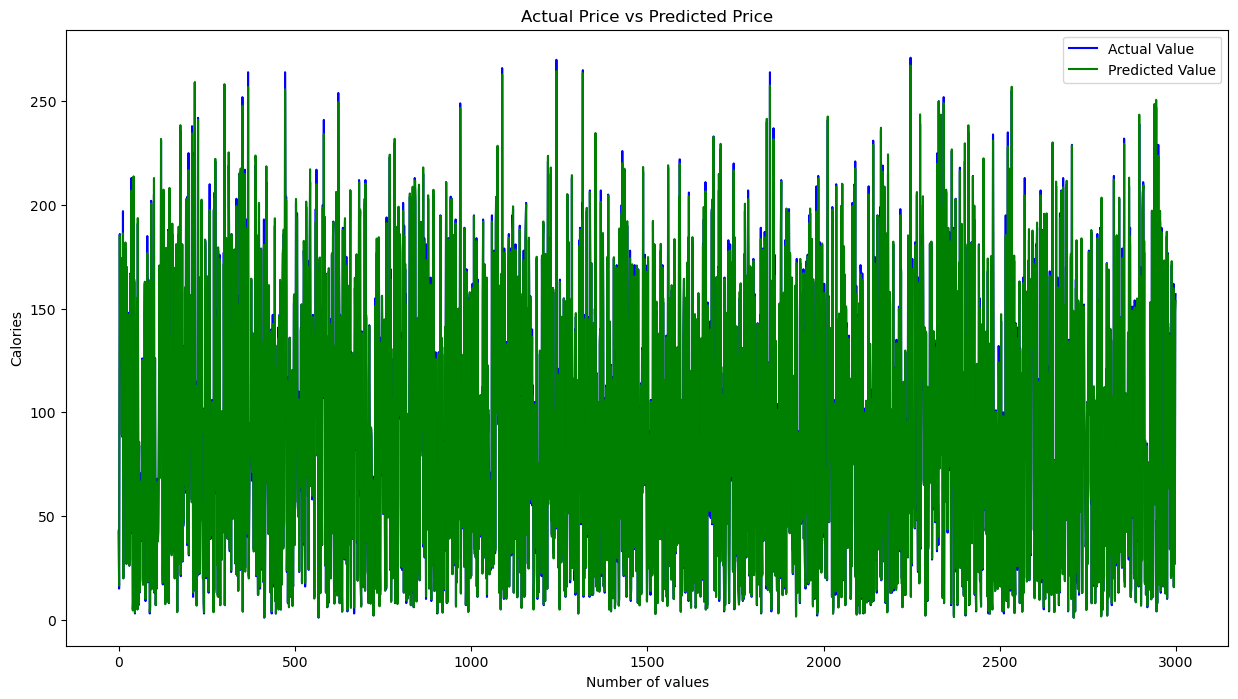

In [56]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(y_pred_test, color = 'green', label = 'Predicted Value')
plt.title('Actual calo vs Predicted calo')
plt.xlabel('Number of values')
plt.ylabel('Calories')
plt.legend()